In [1]:
import cv2
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# **Preprocessing of Testing Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
member_list = ['CY', 'YJ', 'YO', 'HT', 'ZY'] # a list of group member names
data_dir_list = ['drive/MyDrive/AI/CY_Data', 'drive/MyDrive/AI/YJ_Data', 'drive/MyDrive/AI/YO_Data', 'drive/MyDrive/AI/HT_Data', 'drive/MyDrive/AI/ZY_Data'] # a list of training data directories
test_set_dir_list = ['drive/MyDrive/AI/CY_test_set', 'drive/MyDrive/AI/YJ_test_set', 'drive/MyDrive/AI/YO_test_set', 'drive/MyDrive/AI/HT_test_set', 'drive/MyDrive/AI/ZY_test_set'] # a list of testing data directories

CY testing dataset images


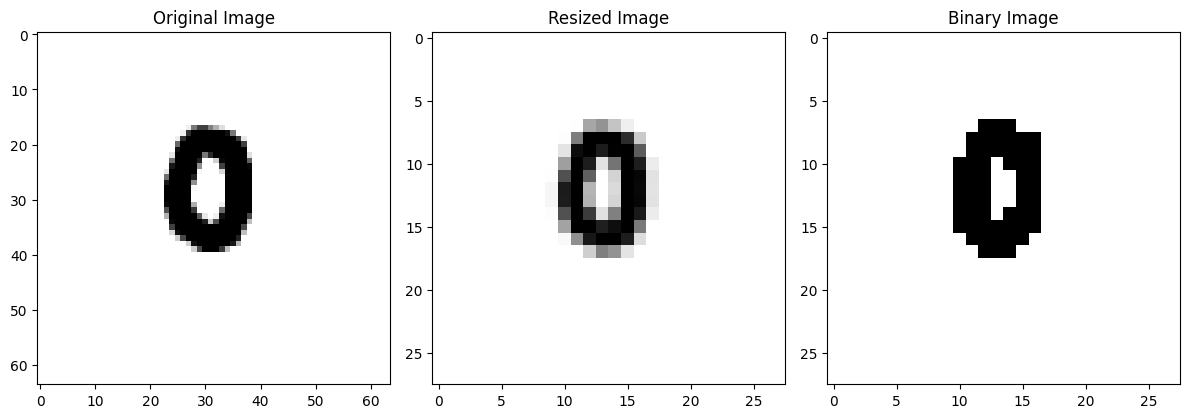

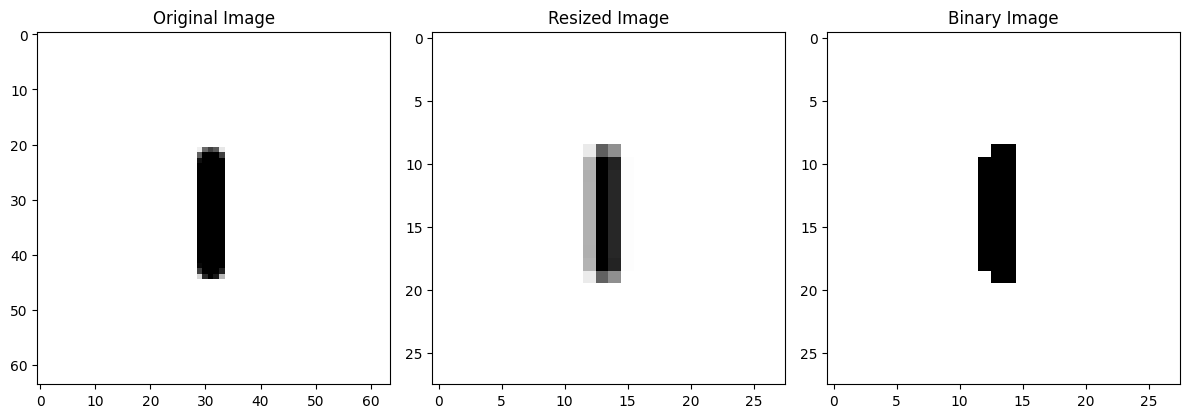

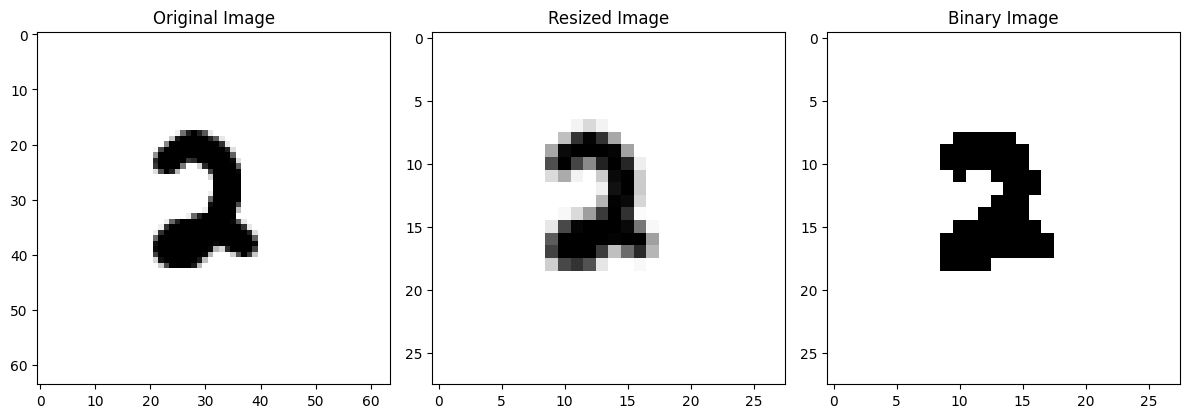

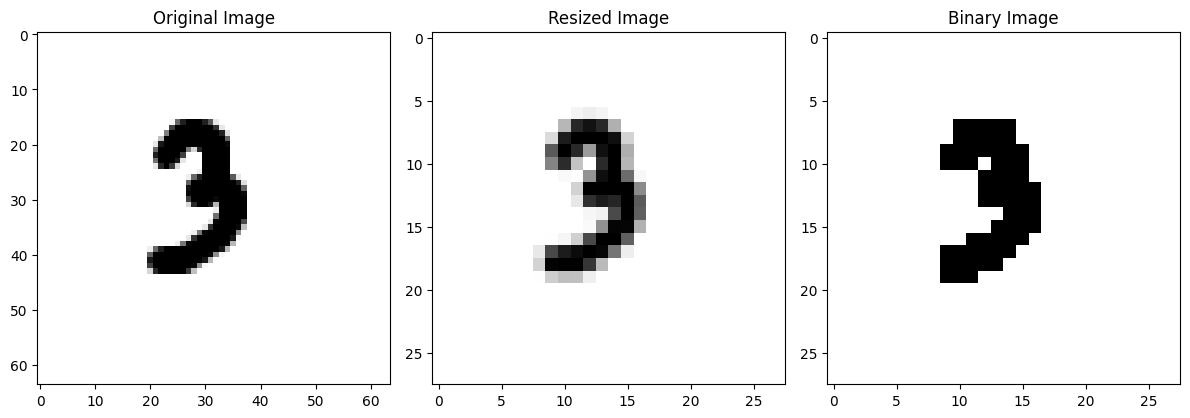

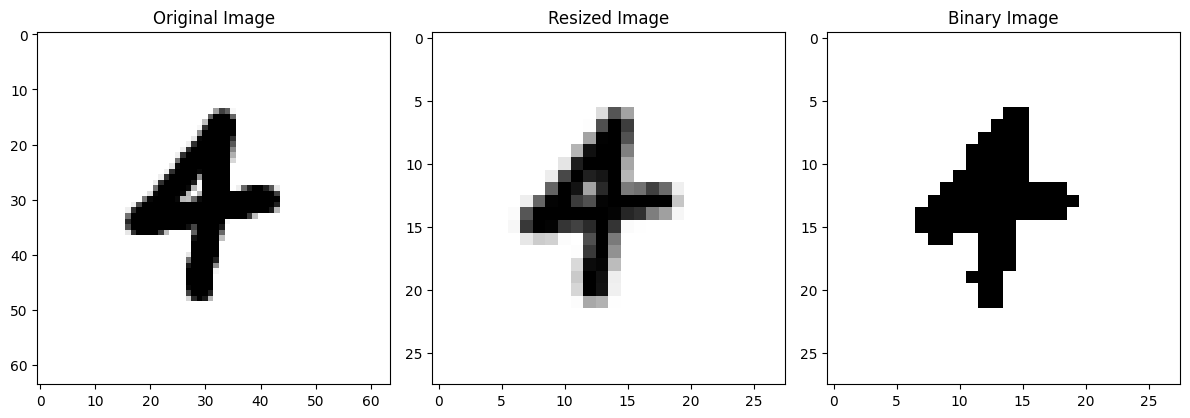

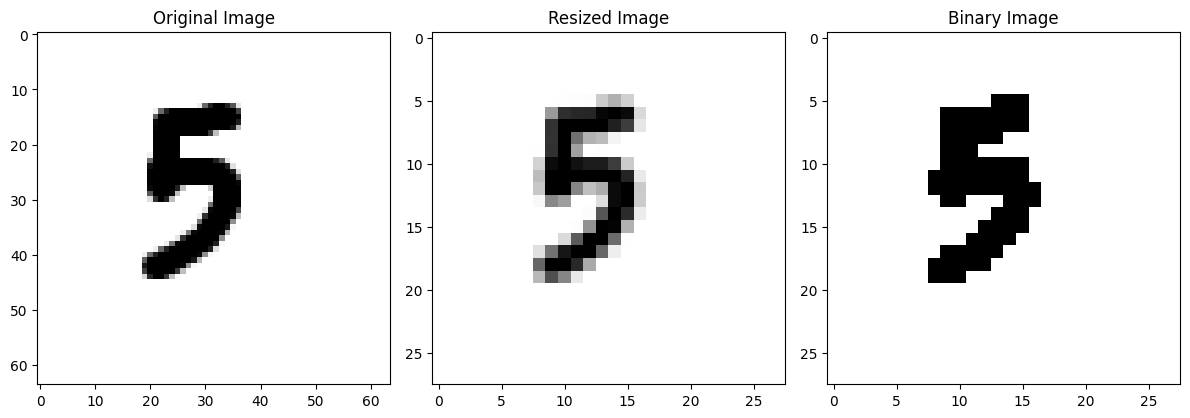

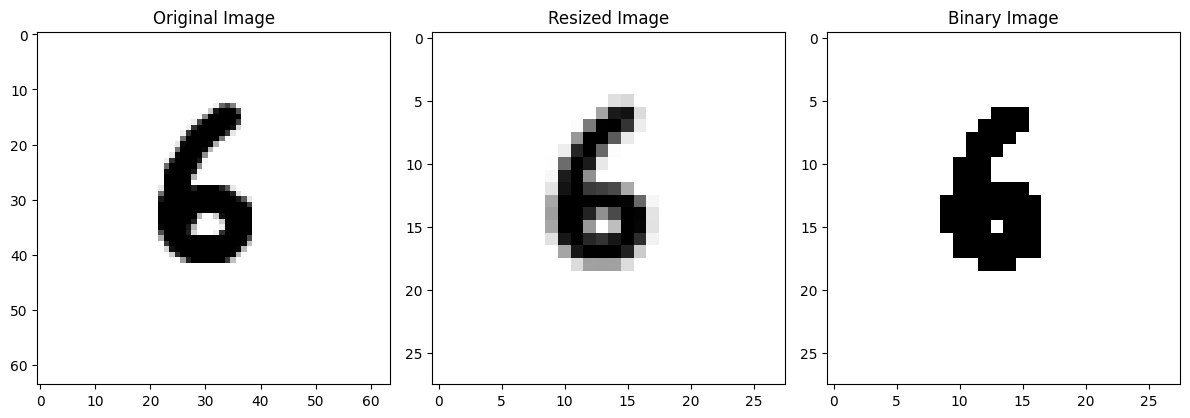

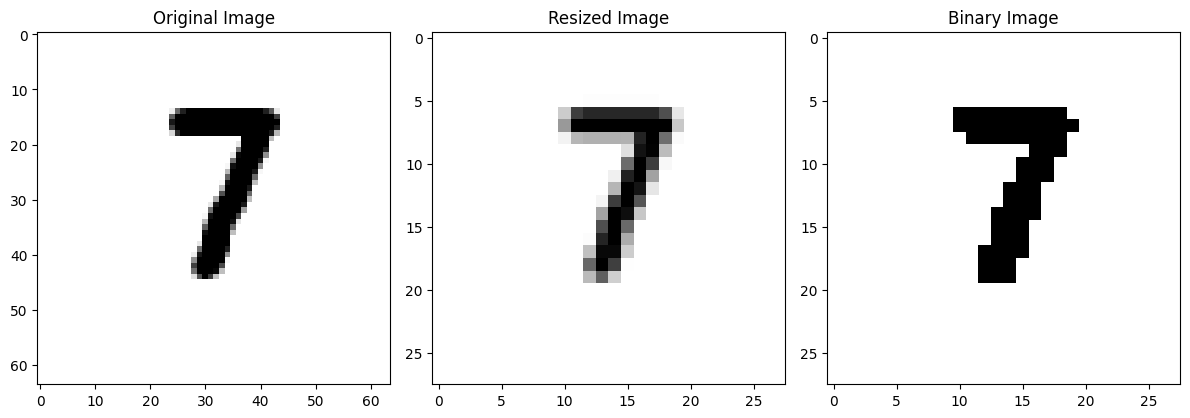

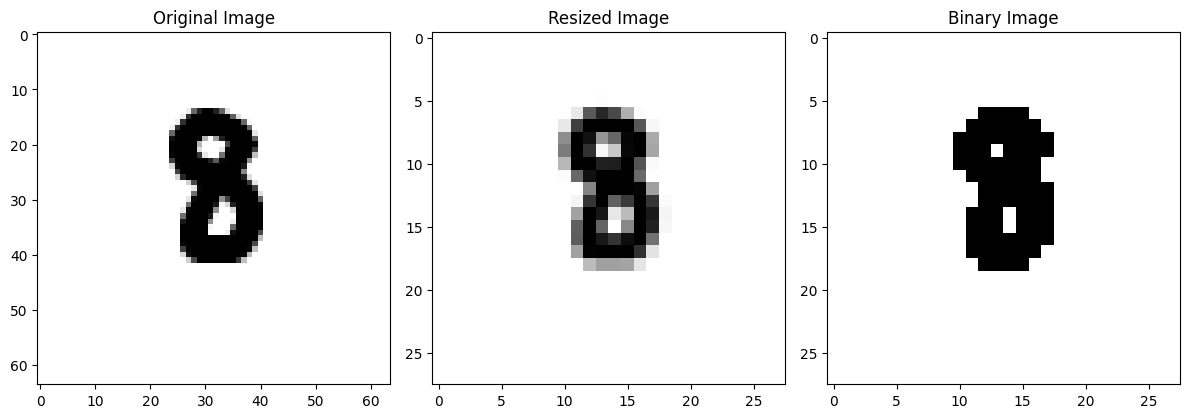

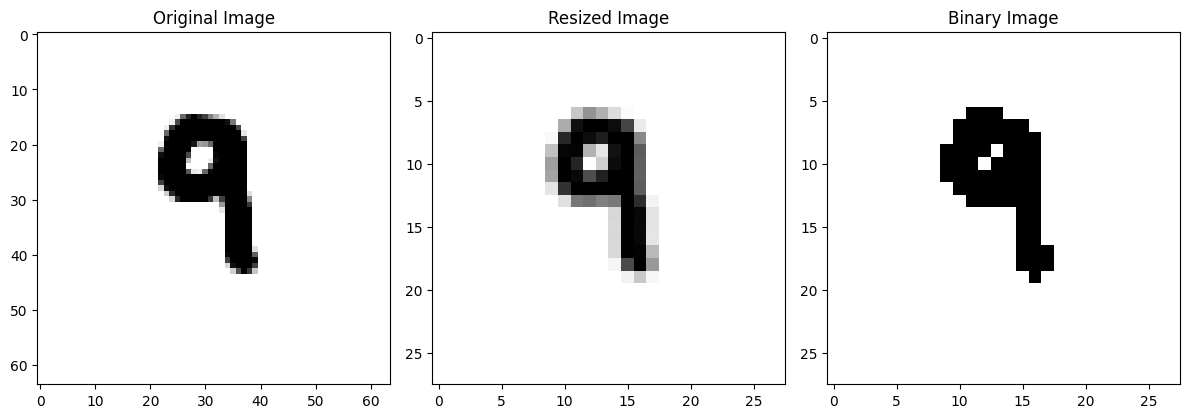

YJ testing dataset images


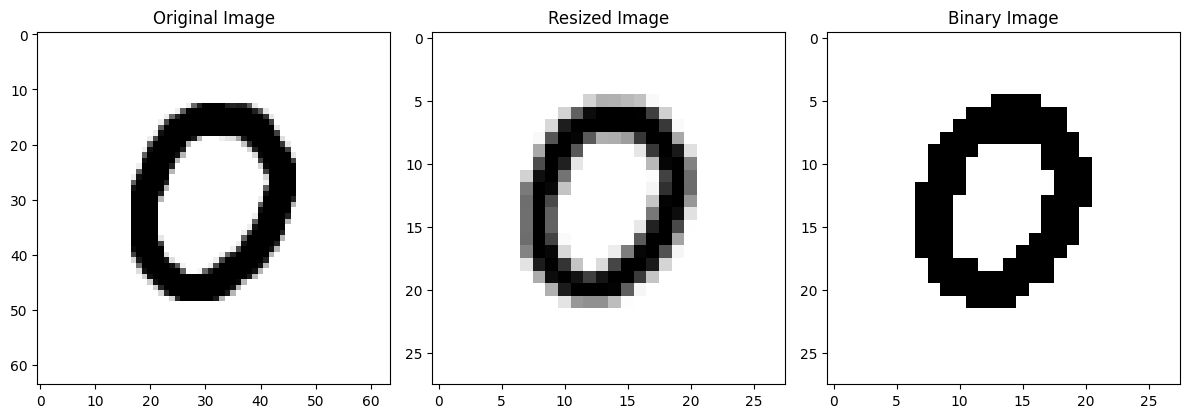

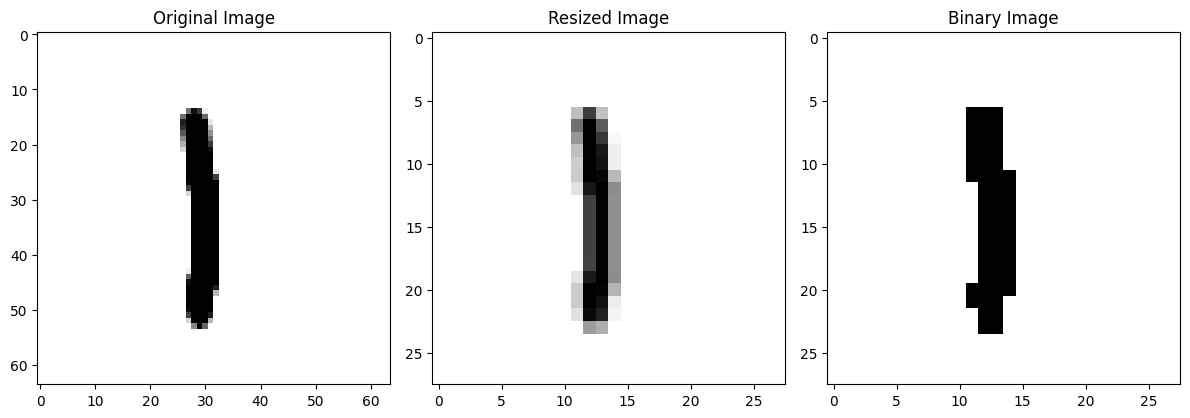

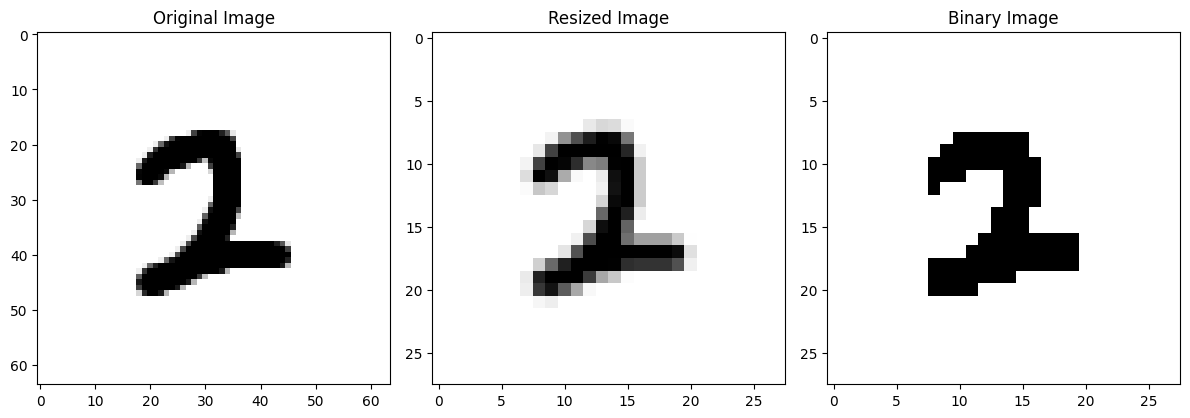

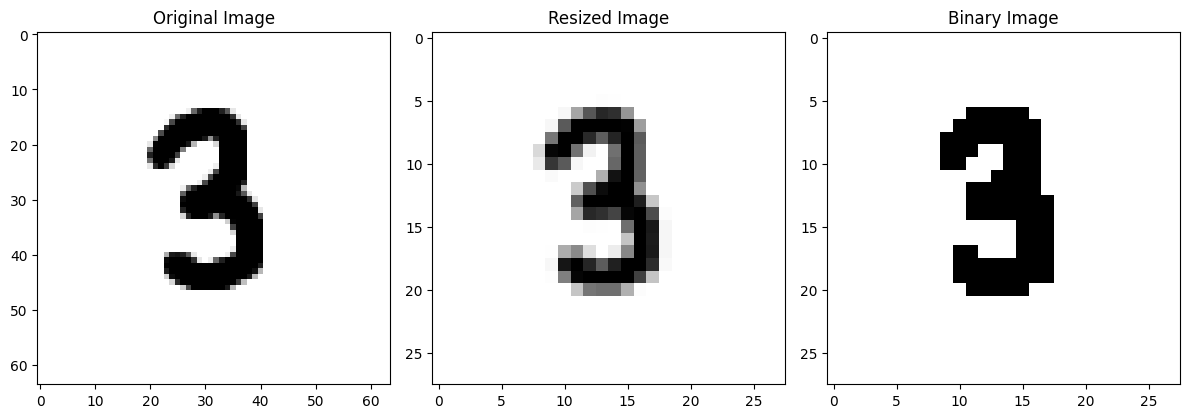

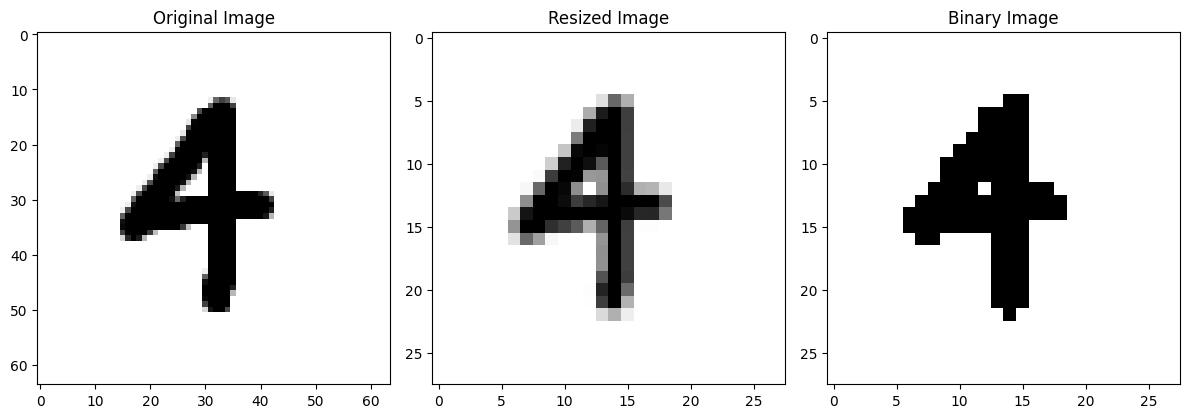

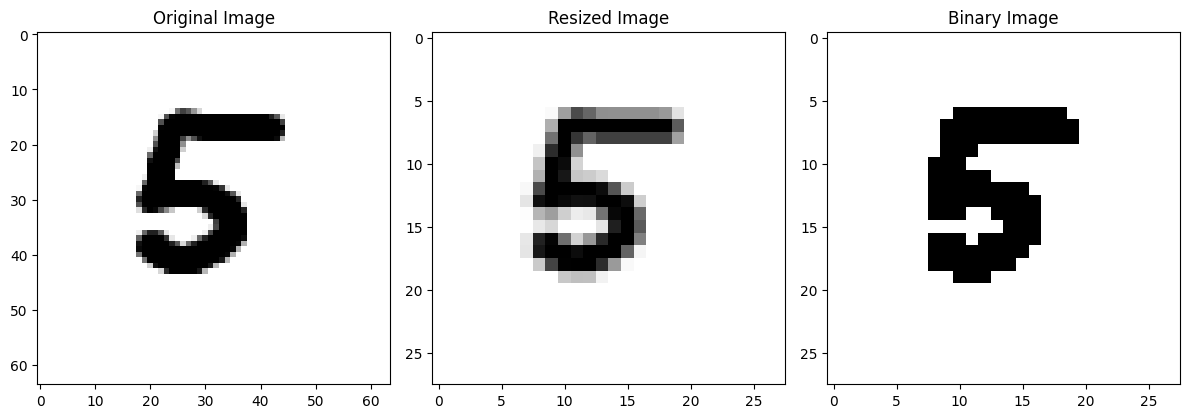

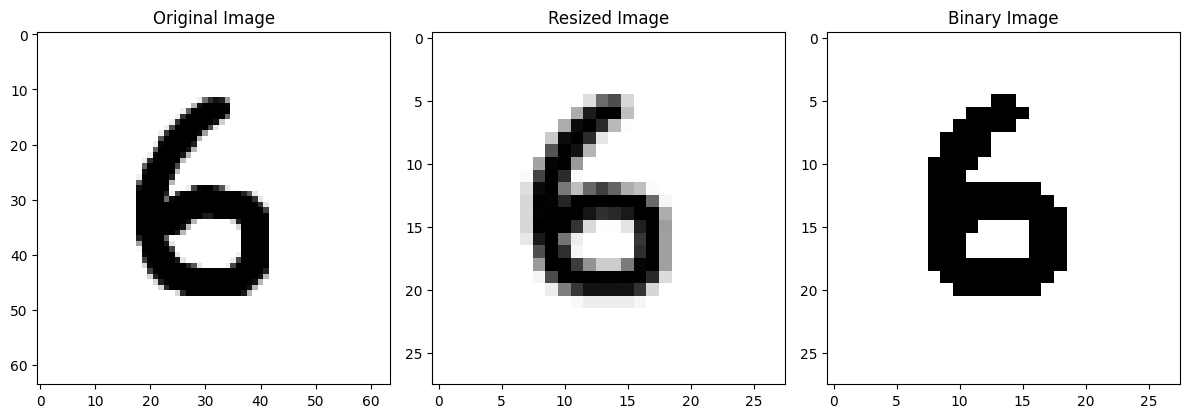

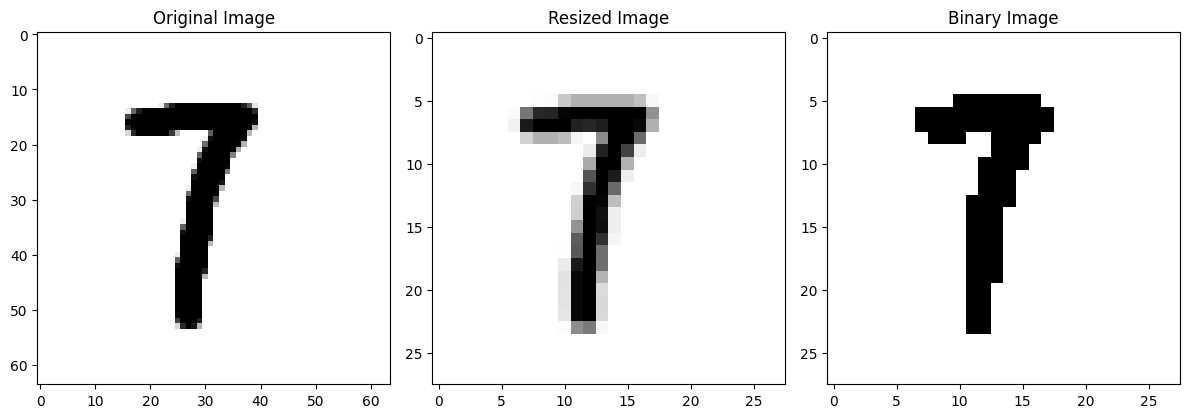

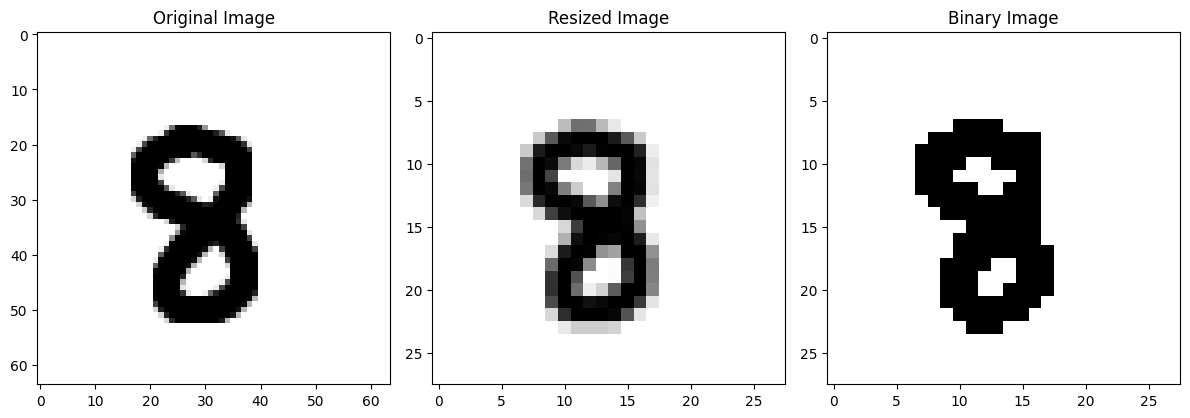

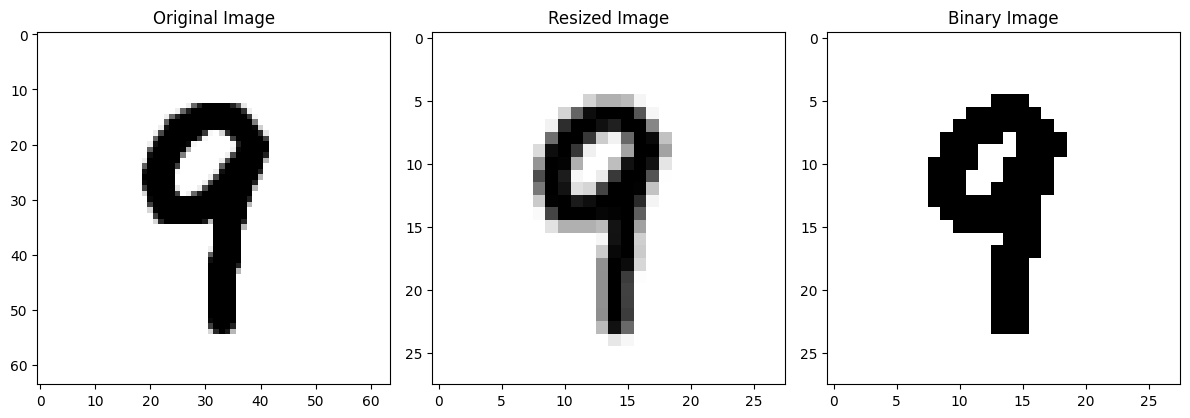

YO testing dataset images


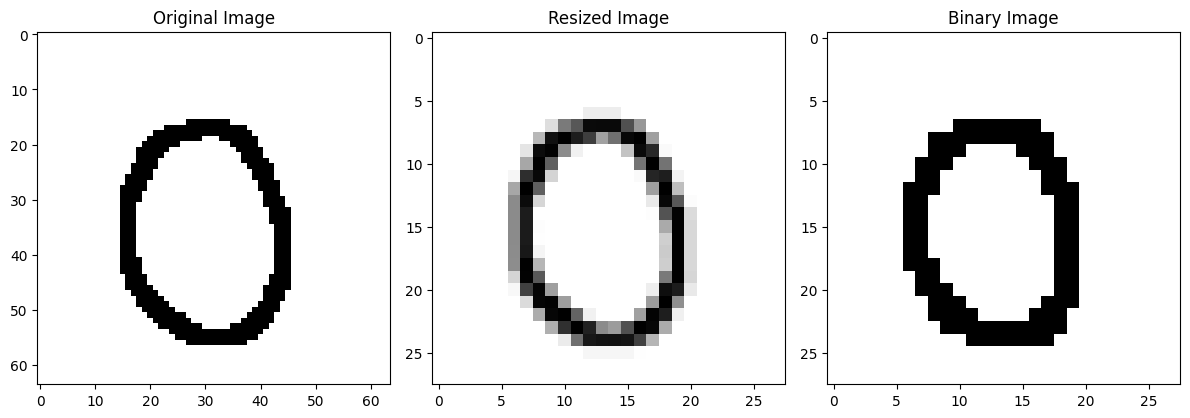

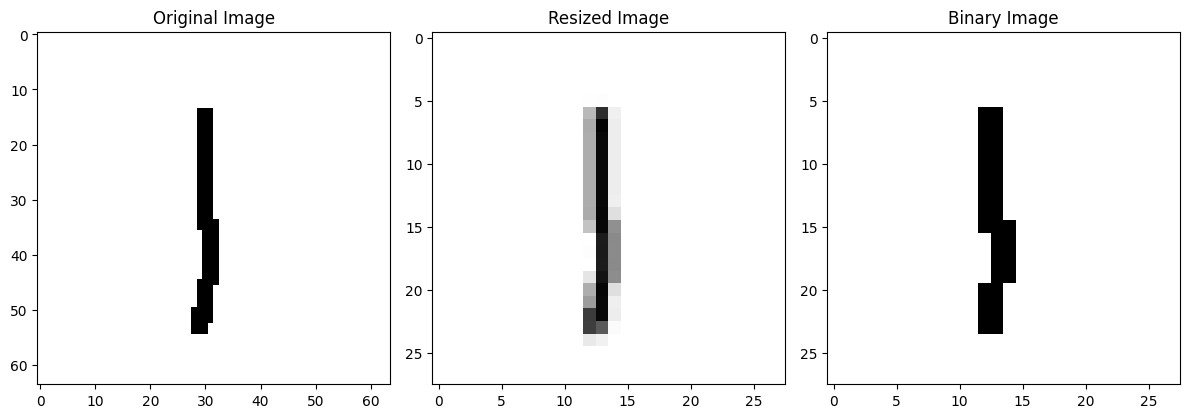

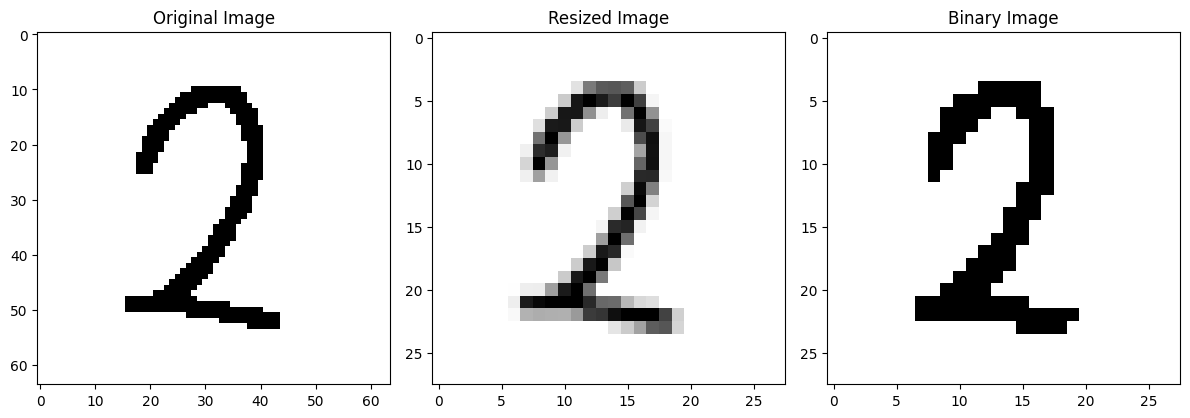

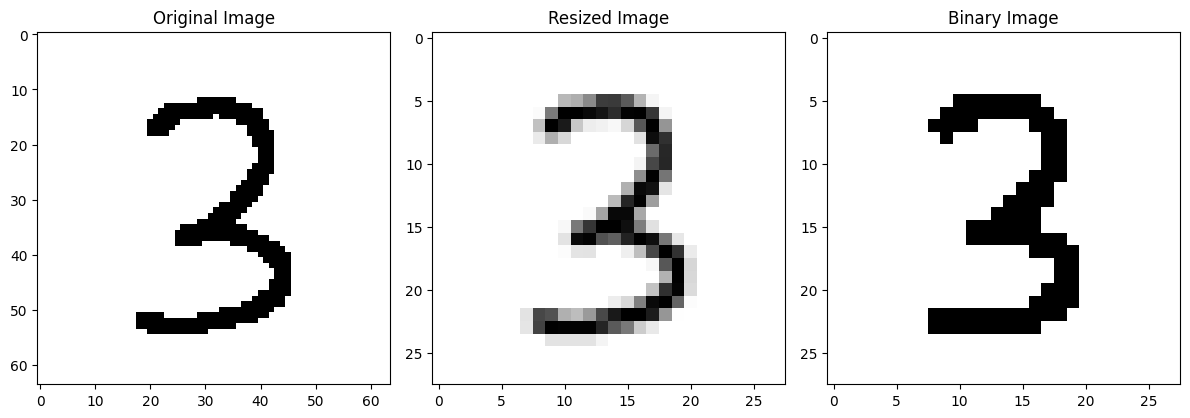

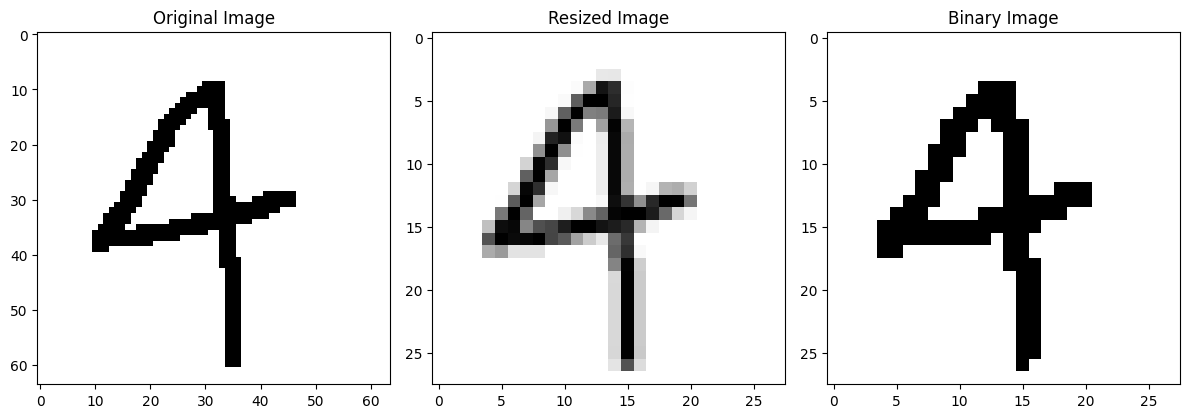

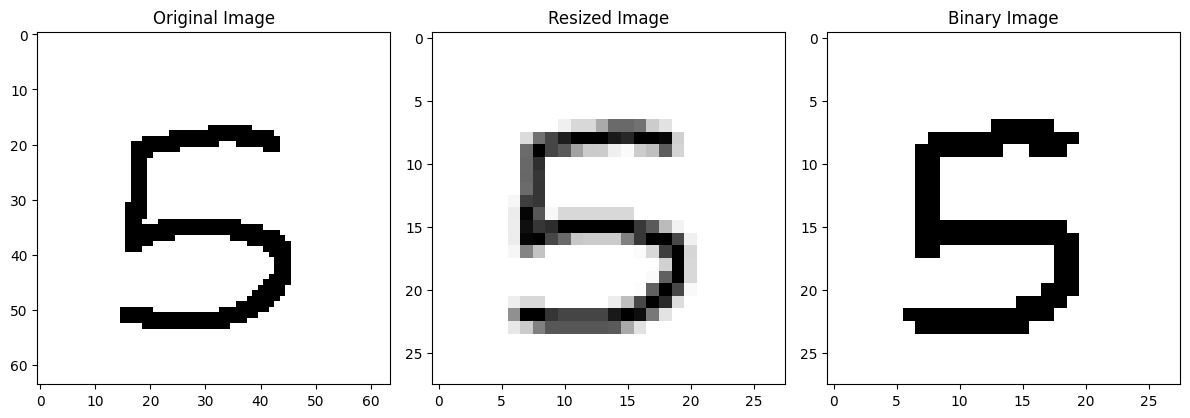

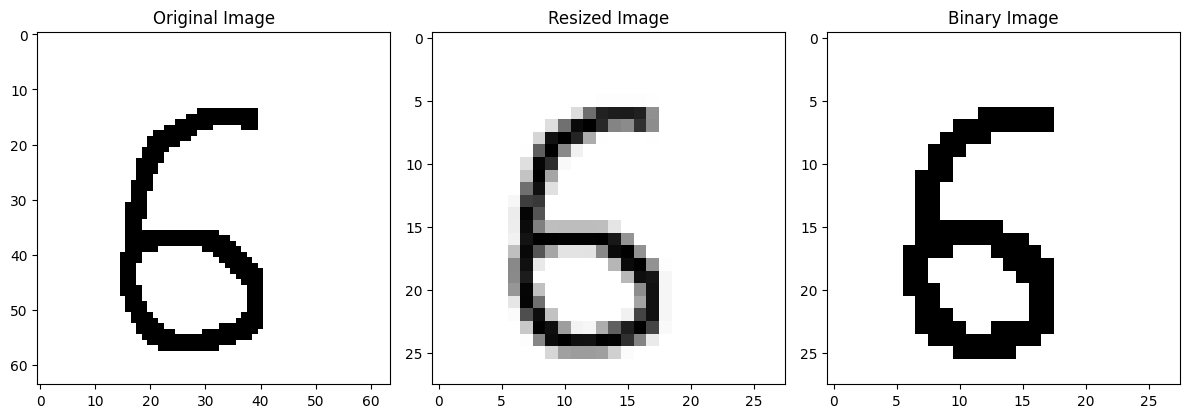

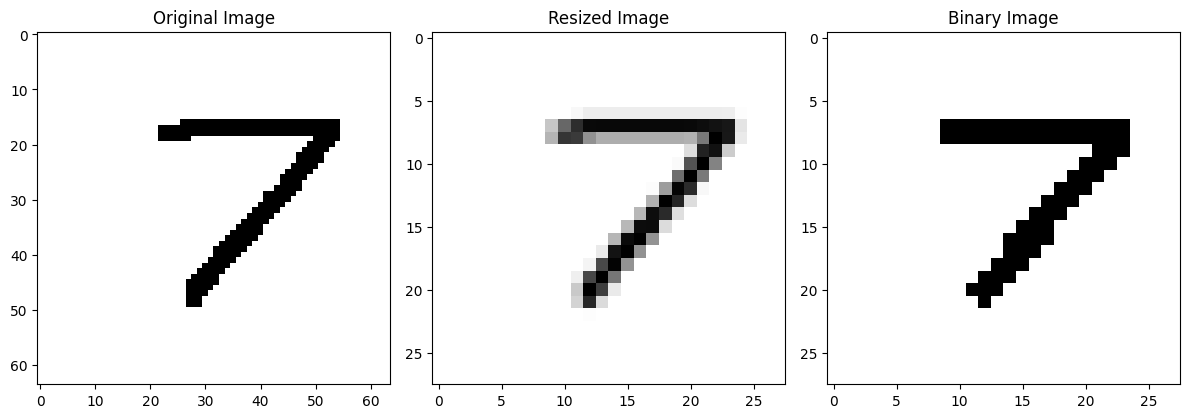

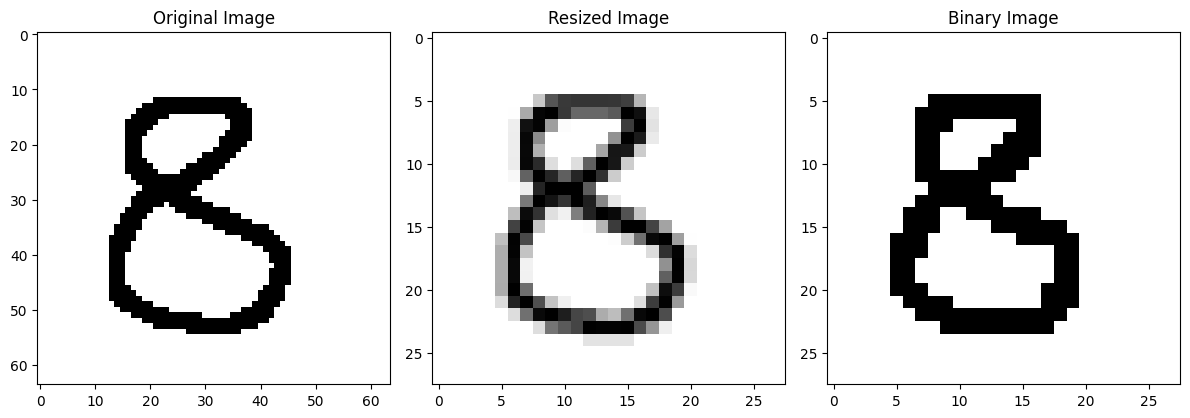

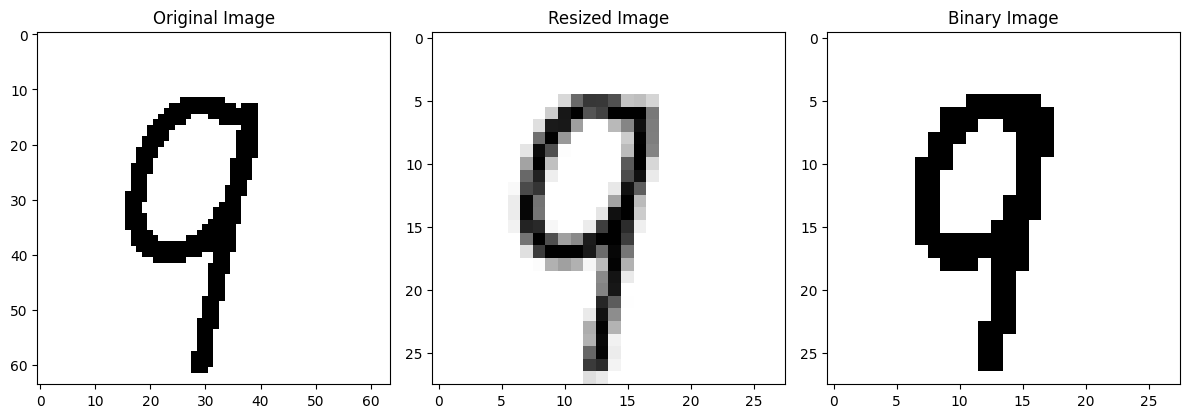

HT testing dataset images


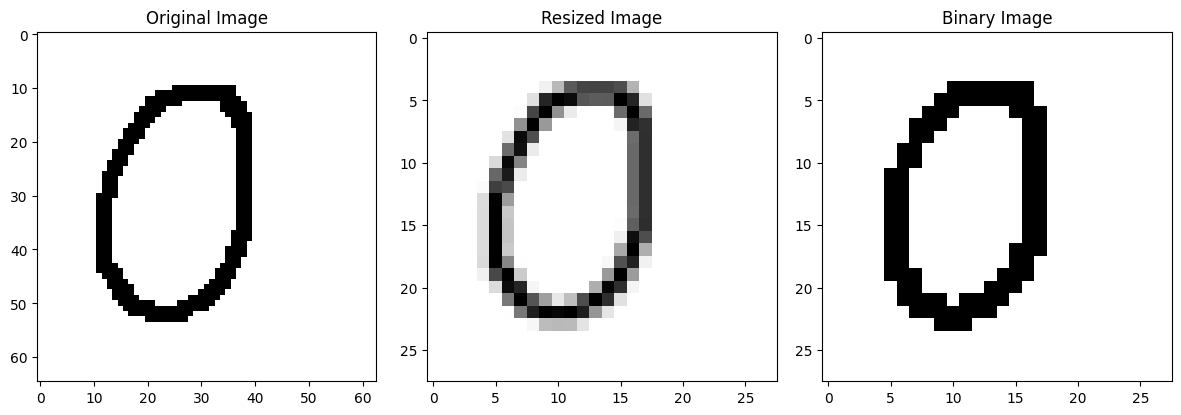

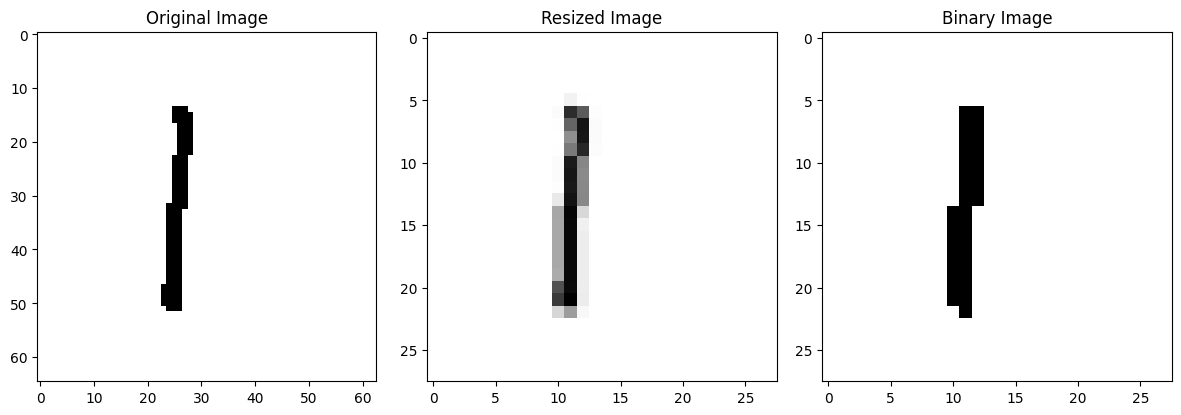

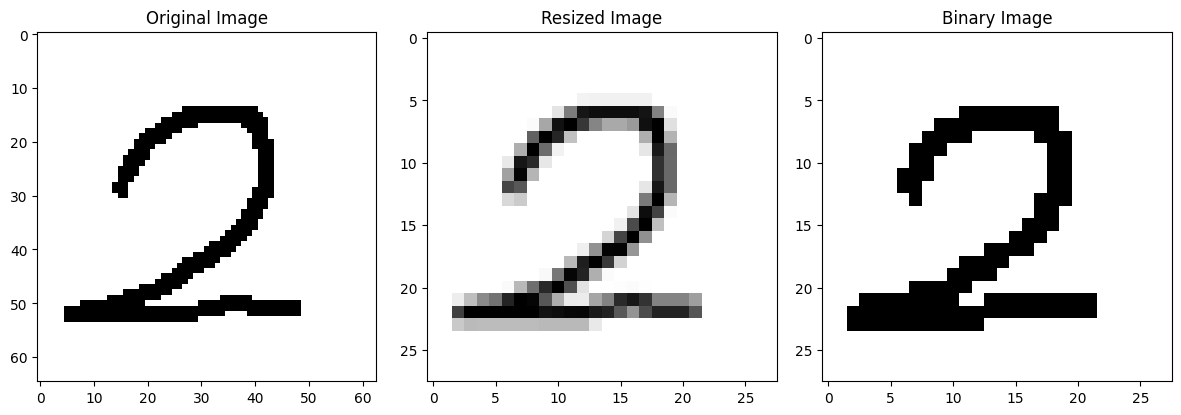

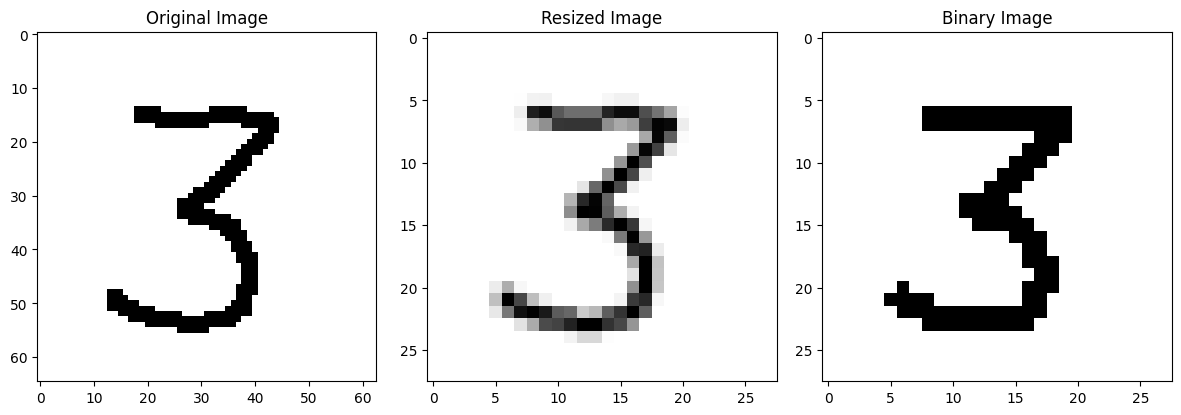

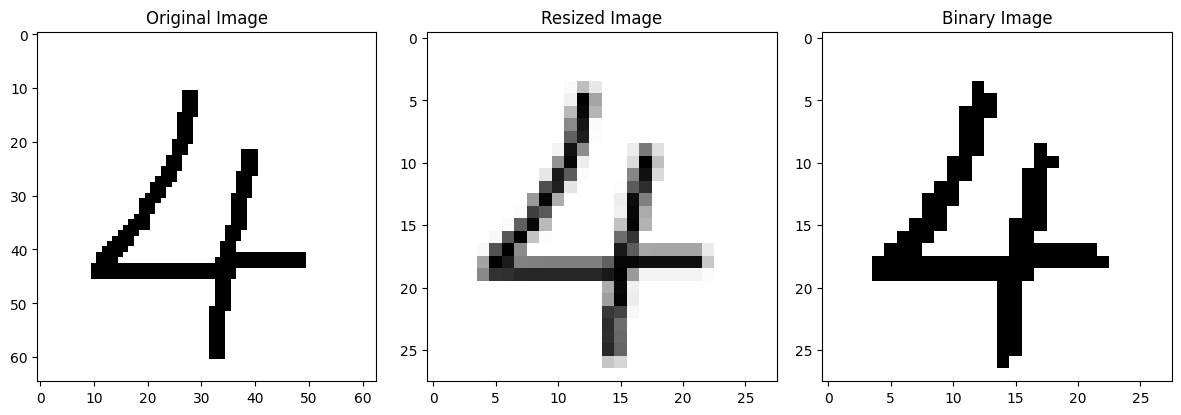

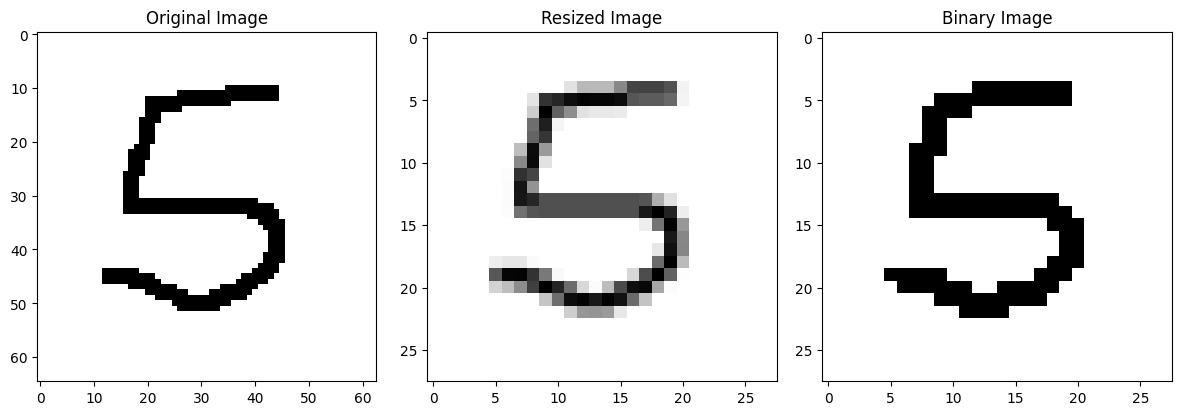

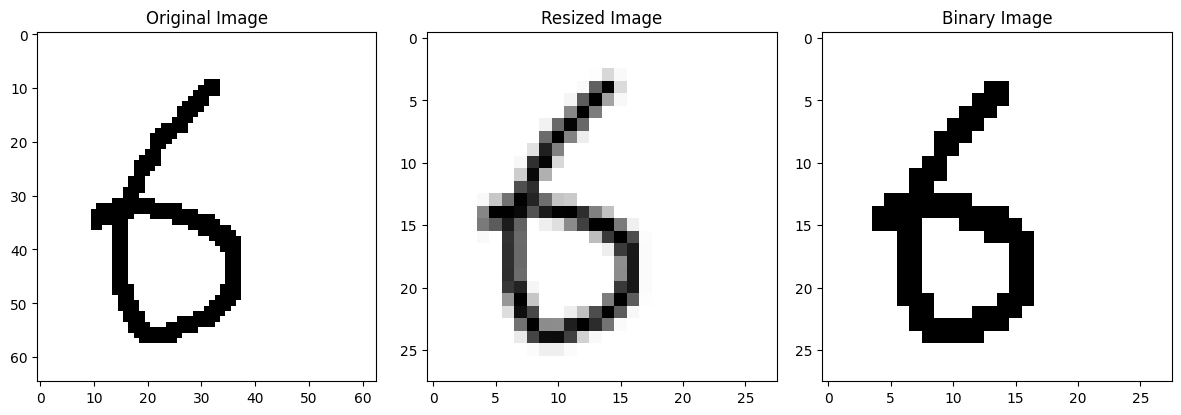

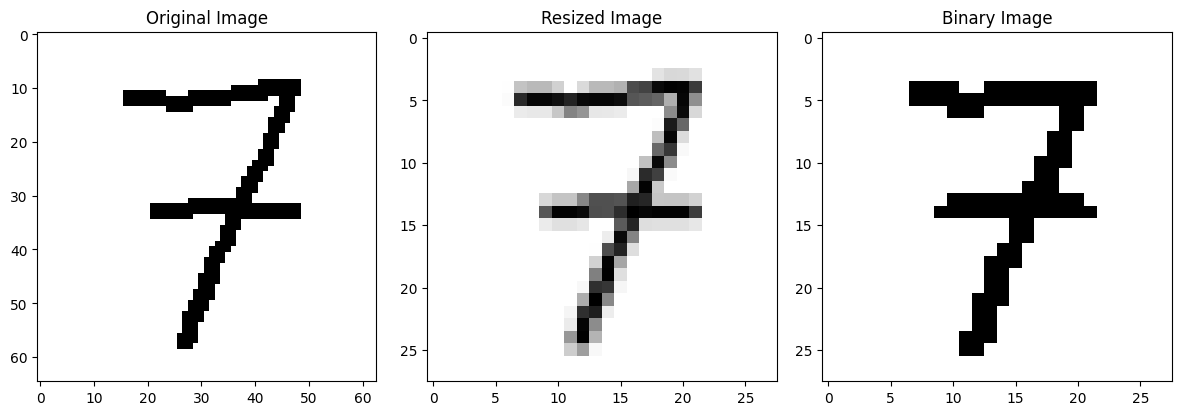

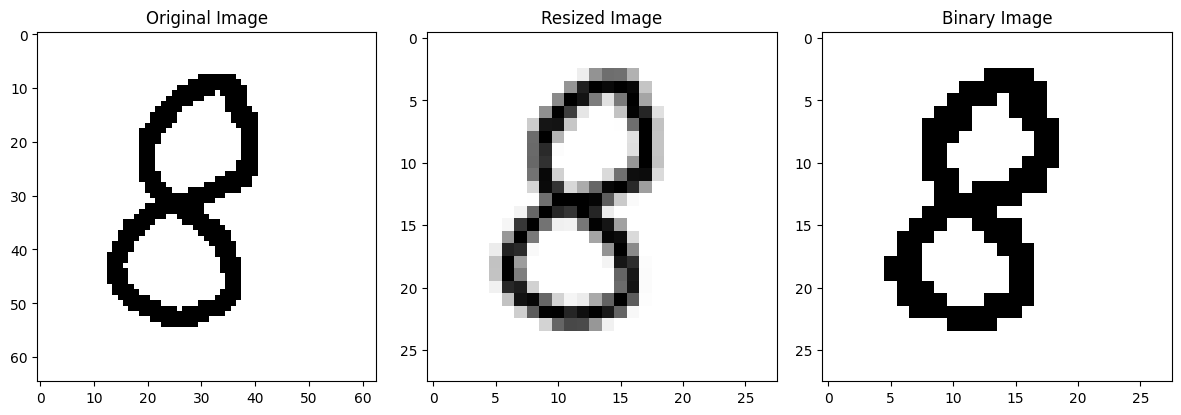

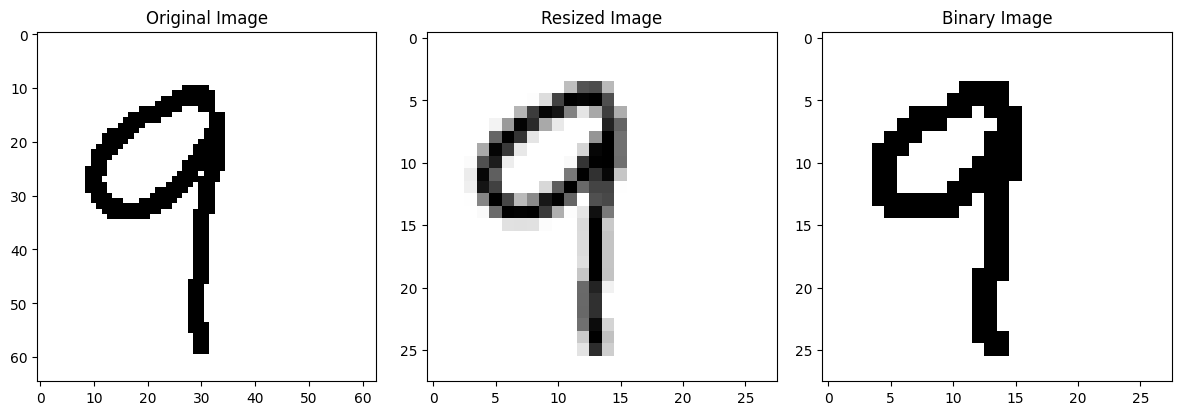

ZY testing dataset images


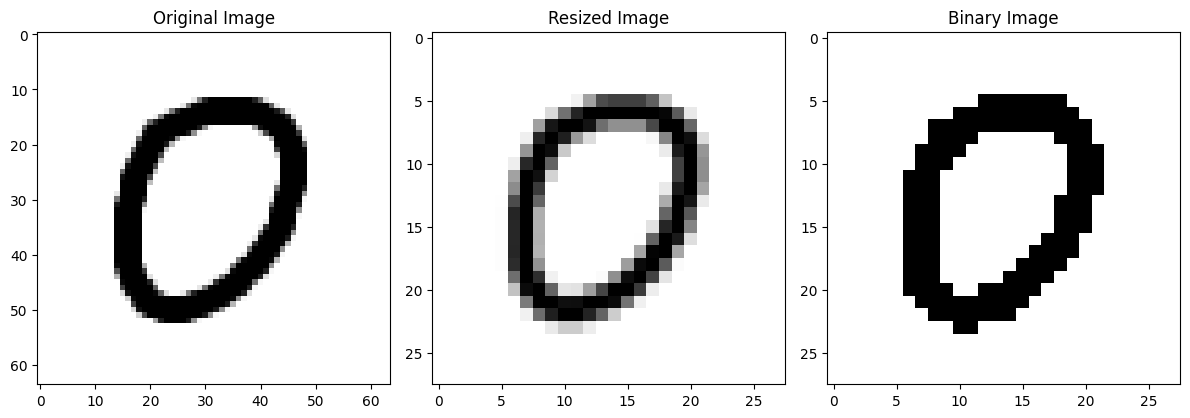

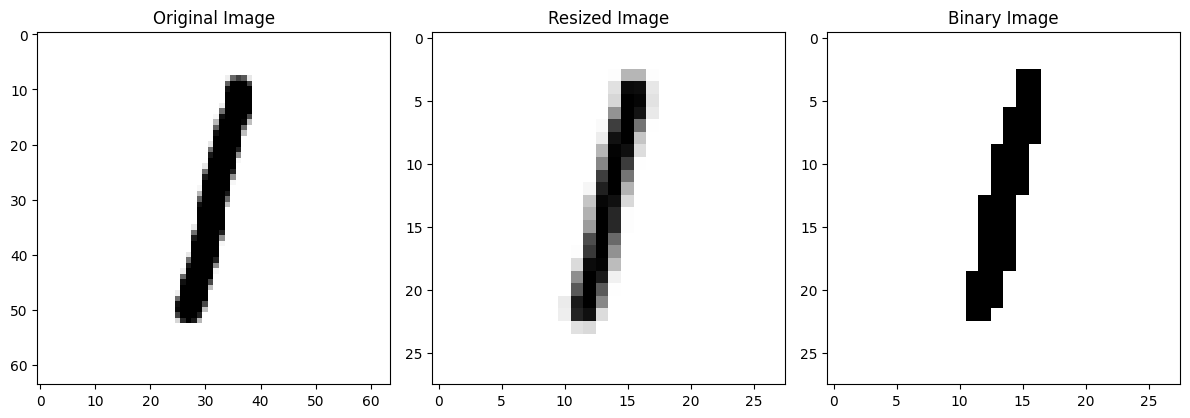

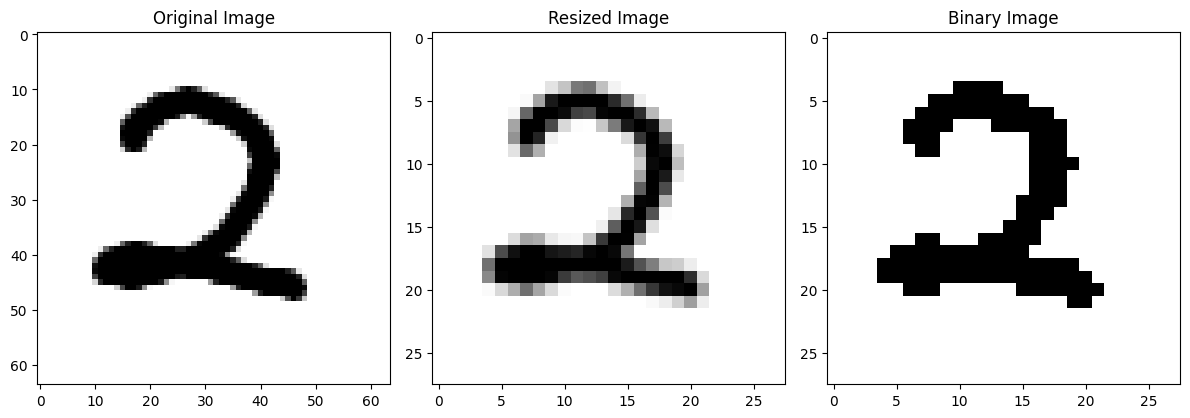

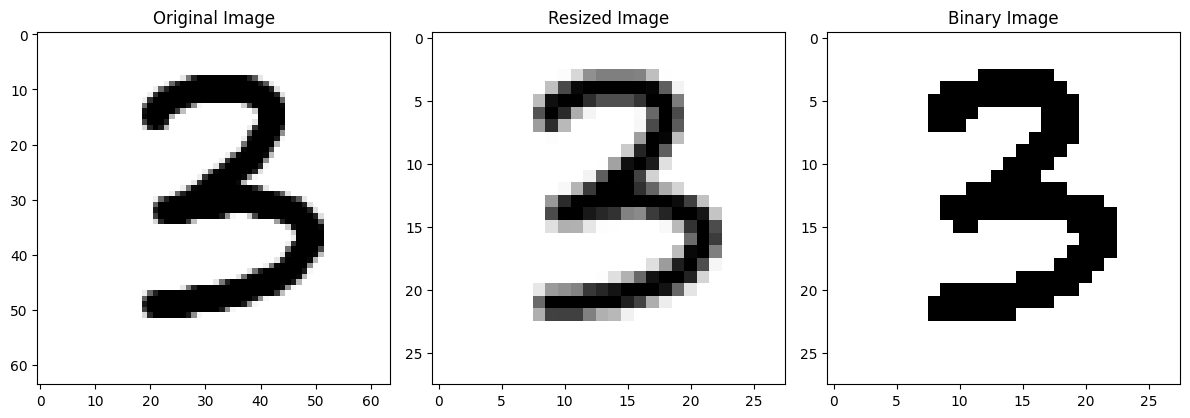

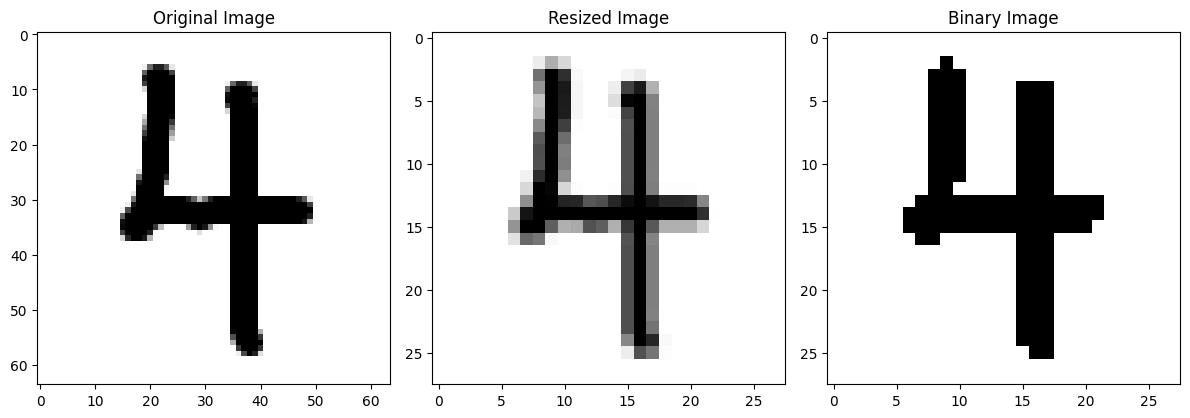

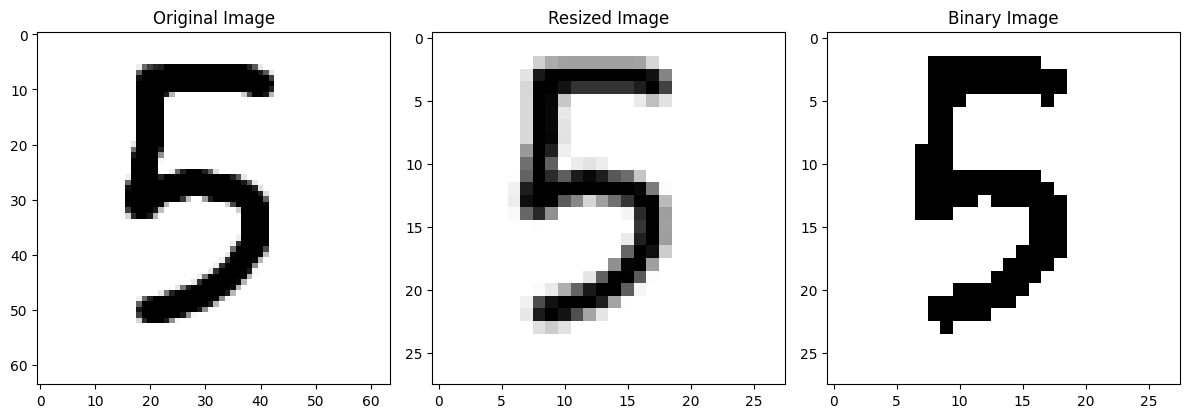

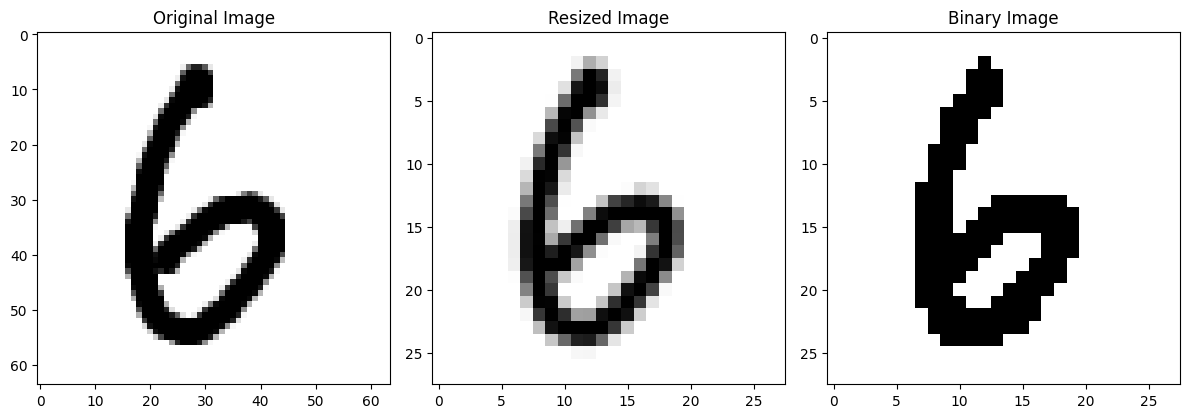

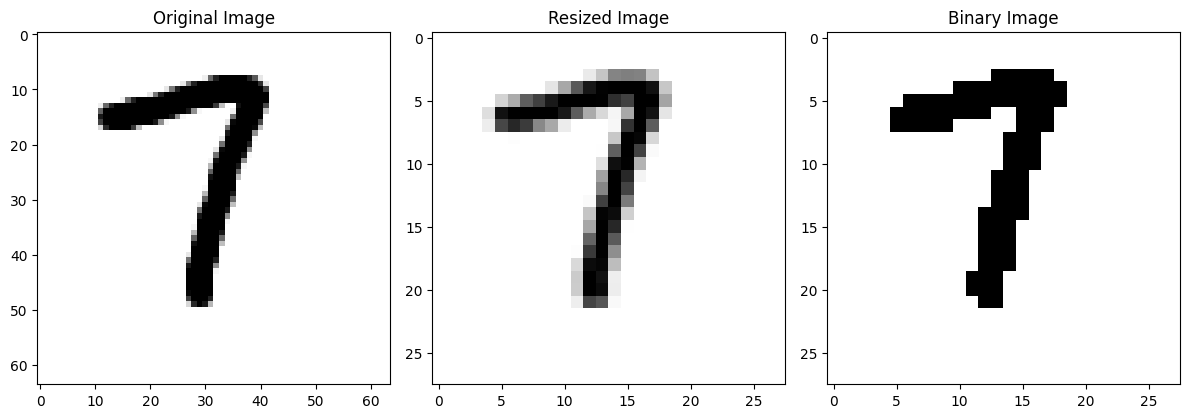

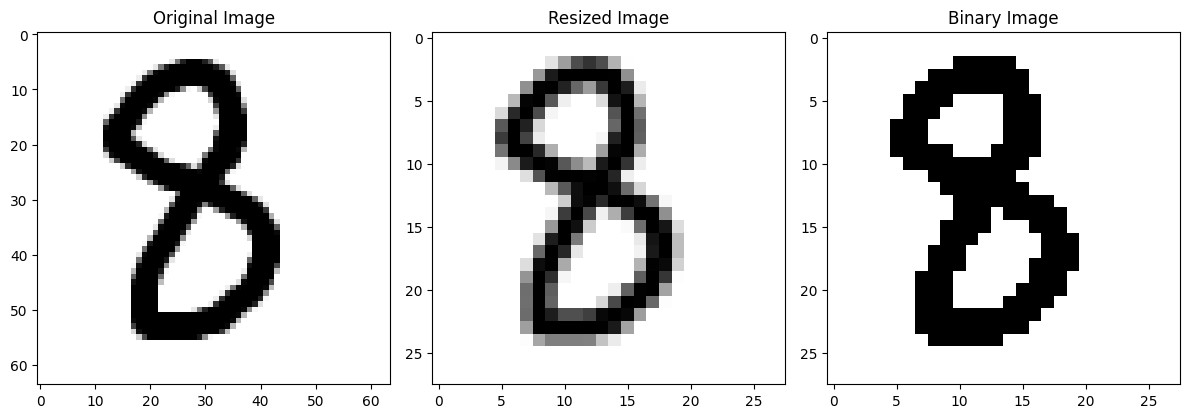

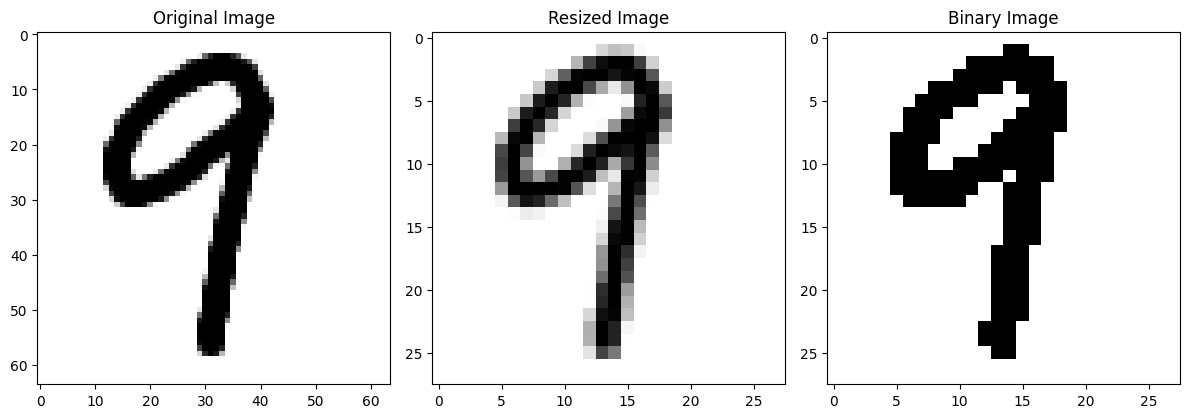

In [4]:
# Preprocessing for testing dataset

for j in range(len(test_set_dir_list)):
  # use a list to store all testing dataset originl images
  raw_images = []

  data_dir = test_set_dir_list[j]

  for image_name in os.listdir(data_dir):
    image_path = os.path.join(data_dir, image_name)
    if image_name.endswith(".png"):
      image = Image.open(image_path)
      raw_images.append(image)

  # use a list to store all testing dataset resized images
  resized_images = []
  # use a list to store all testing dataset binary images
  binary_images = []

  for image in raw_images:
      # resize images to dimension 28*28
      resized_image = image.resize((28, 28))
      resized_images.append(resized_image)

      threshold = 210
      # convert images to binary images
      binary_image = resized_image.convert("L").point(lambda x: 0 if x < threshold else 255, mode="1")
      binary_images.append(binary_image)

  print(f'{member_list[j]} testing dataset images')

  ## save all the preprocessed resized images
  output_dir = f"drive/MyDrive/AI/test_set_resized/{member_list[j]}"
  if not os.path.exists(output_dir):
      os.makedirs(output_dir)

  for i, image in enumerate(resized_images):
      image_path = os.path.join(output_dir, f"{member_list[j]}_{i}_resized.png")
      image.save(image_path)

  ## save all the preprocessed binary images
  output_dir = f"drive/MyDrive/AI/test_set_binary/{member_list[j]}"
  if not os.path.exists(output_dir):
      os.makedirs(output_dir)

  for i, image in enumerate(binary_images):
      image_path = os.path.join(output_dir, f"{member_list[j]}_{i}_binary.png")
      image.save(image_path)

  # display all preprocessed images
  for i in range(10):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(raw_images[i], cmap='gray', vmin=0, vmax=1)
    axes[0].set_title('Original Image')

    axes[1].imshow(resized_images[i], cmap='gray', vmin=0, vmax=1)
    axes[1].set_title('Resized Image')

    axes[2].imshow(binary_images[i], cmap='gray', vmin=0, vmax=1)
    axes[2].set_title('Binary Image')

    plt.tight_layout()
    plt.show()

# **Preprocessing of Training Dataset**

In [33]:
raw_images = []
loaded_resized_images = []
loaded_binary_images = []
for j in range(len(data_dir_list)):
  # The directory for the current member
  data_dir = data_dir_list[j]

  # Prepare the output directory
  output_dir = f"drive/MyDrive/AI/training_set_binary/{member_list[j]}"
  if not os.path.exists(output_dir):
    os.makedirs(output_dir)

  # Loop over all digit subdirectories in the member directory
  for digit in range(10):
    digit_dir = os.path.join(data_dir, str(digit))

    if os.path.exists(digit_dir):
      for i, image_name in enumerate(sorted(os.listdir(digit_dir))):
        if image_name.endswith(".png"):
          image_path = os.path.join(digit_dir, image_name)
          image = Image.open(image_path)

          # Resize and binarize the image
          resized_image = image.resize((28, 28))
          threshold = 210
          binary_image = resized_image.convert("L").point(lambda x: 0 if x < threshold else 255, mode="1")

          if j == len(data_dir_list)-1:
            raw_images.append(image)
            loaded_resized_images.append(resized_image)
            loaded_binary_images.append(binary_image)

          # Save the binary image
          image_path = os.path.join(output_dir, f"{digit*10+i}_binary.png")
          binary_image.save(image_path)

  print(f'Images of member {member_list[j]} are saved')

Images of member CY are saved
Images of member YJ are saved
Images of member YO are saved
Images of member HT are saved
Images of member ZY are saved


# Display a few Preprocessed Training Images

100
100
100


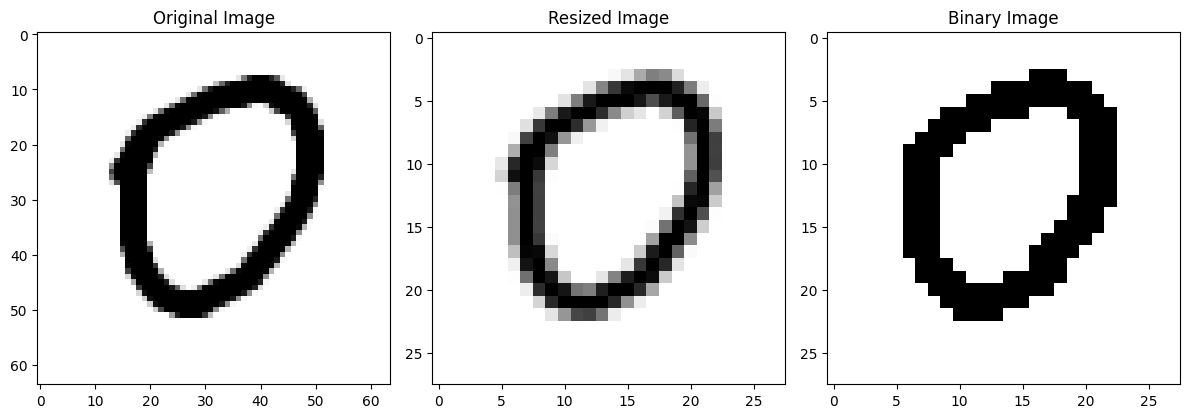

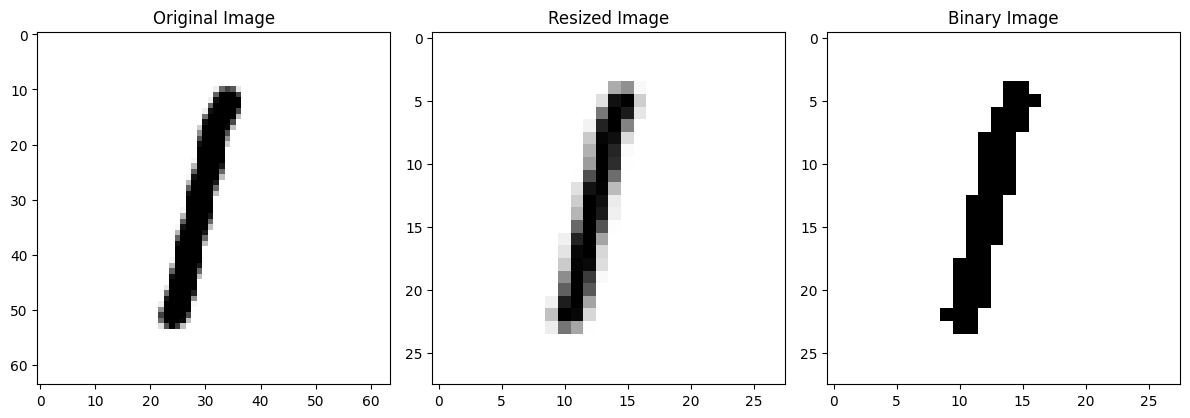

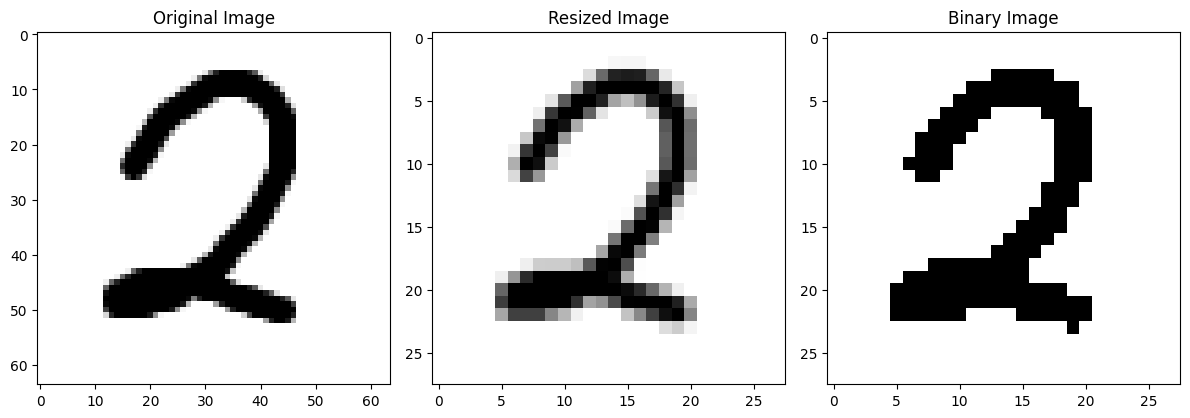

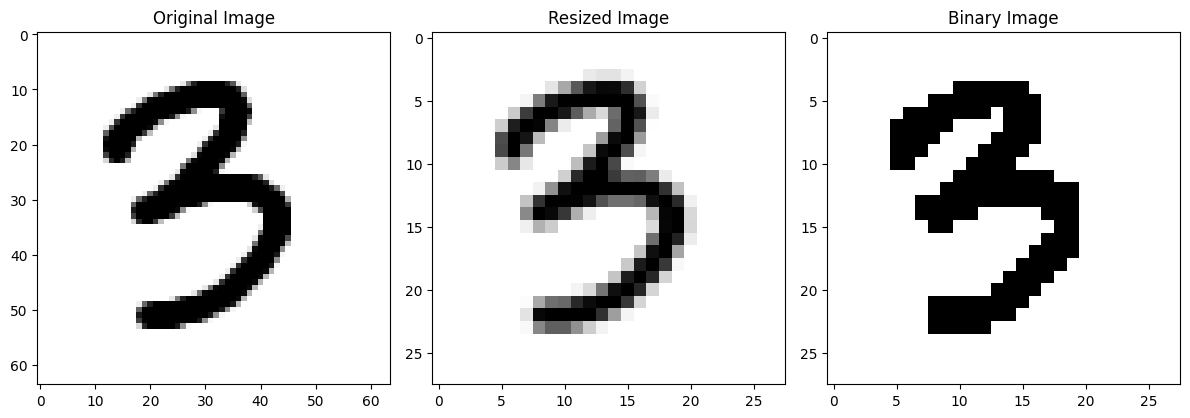

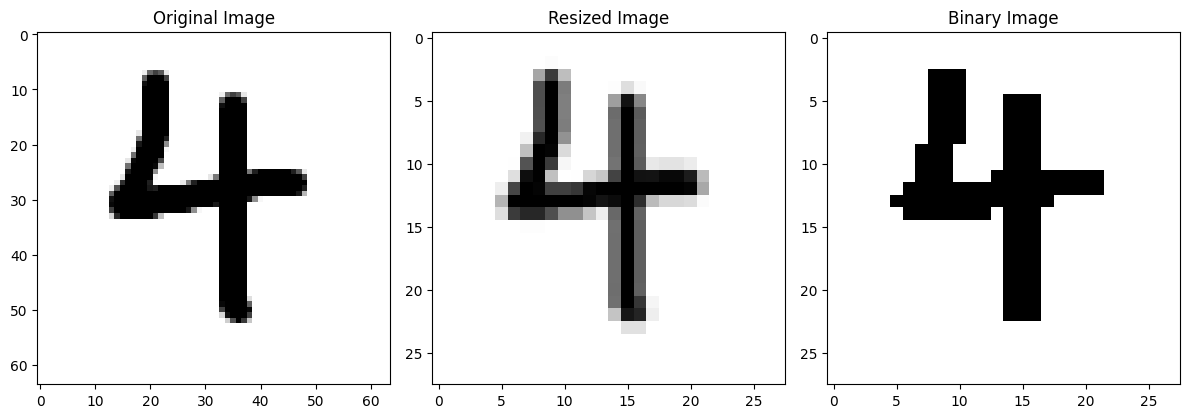

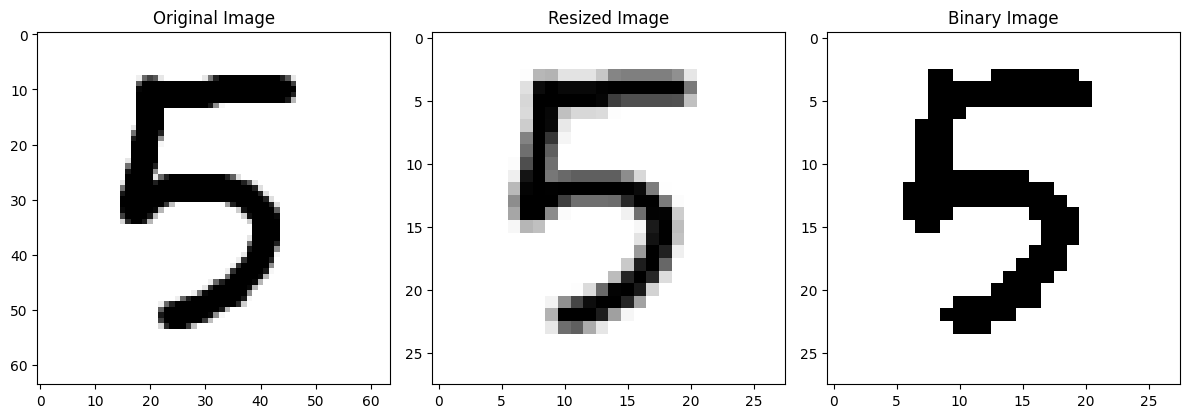

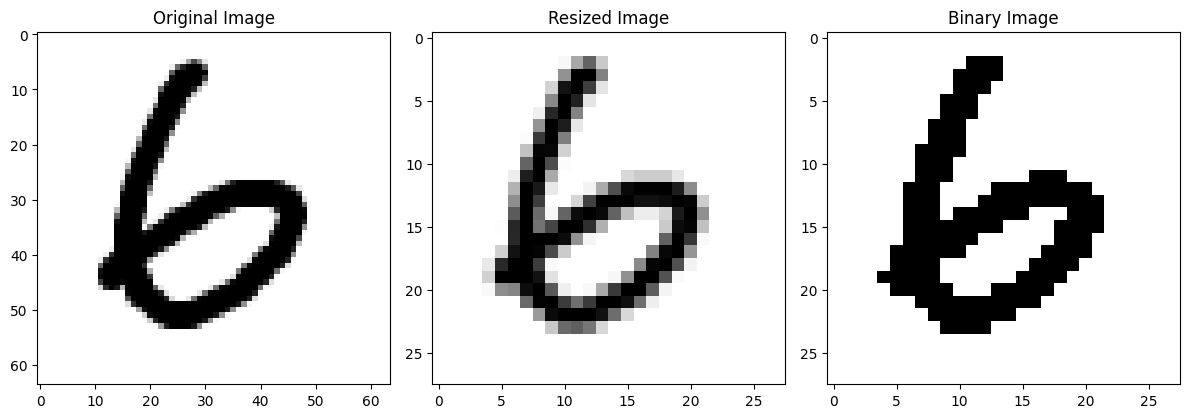

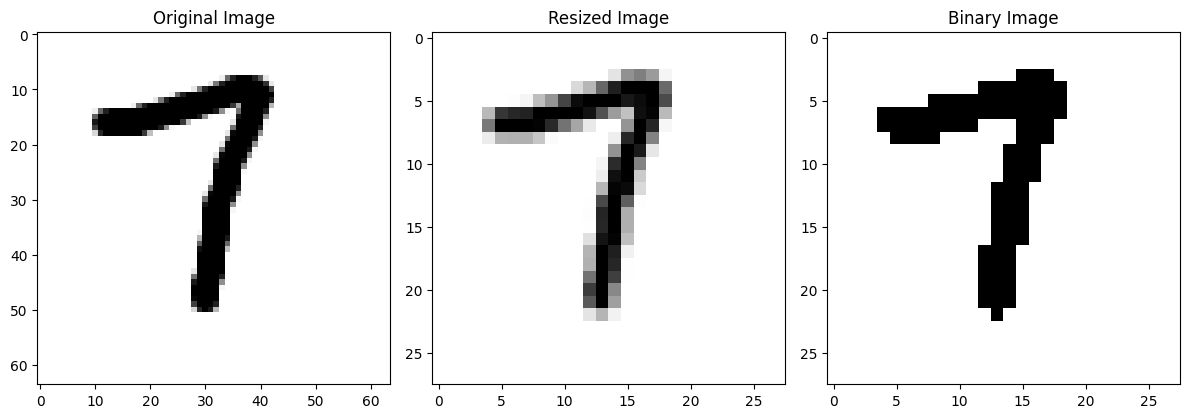

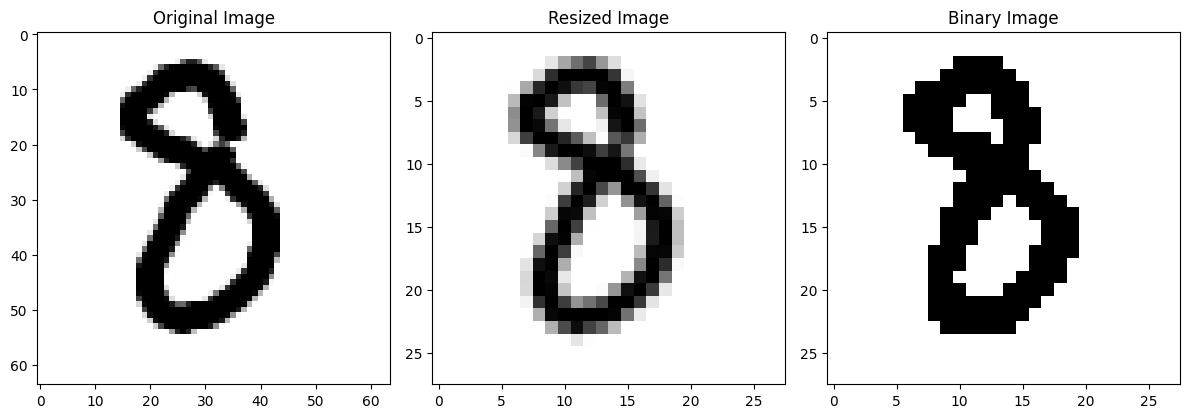

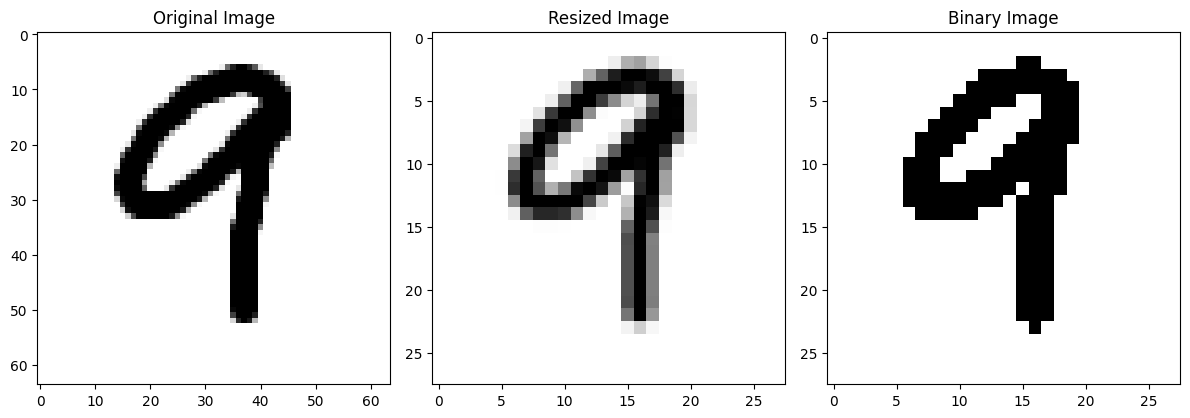

In [34]:
print(len(raw_images))
print(len(loaded_resized_images))
print(len(loaded_binary_images))
for i in range(0, 100, 10):
  fig, axes = plt.subplots(1, 3, figsize=(12, 4))

  axes[0].imshow(raw_images[i], cmap='gray', vmin=0, vmax=1)
  axes[0].set_title('Original Image')

  axes[1].imshow(loaded_resized_images[i], cmap='gray', vmin=0, vmax=1)
  axes[1].set_title('Resized Image')

  axes[2].imshow(loaded_binary_images[i], cmap='gray', vmin=0, vmax=1)
  axes[2].set_title('Binary Image')

  plt.tight_layout()
  plt.show()

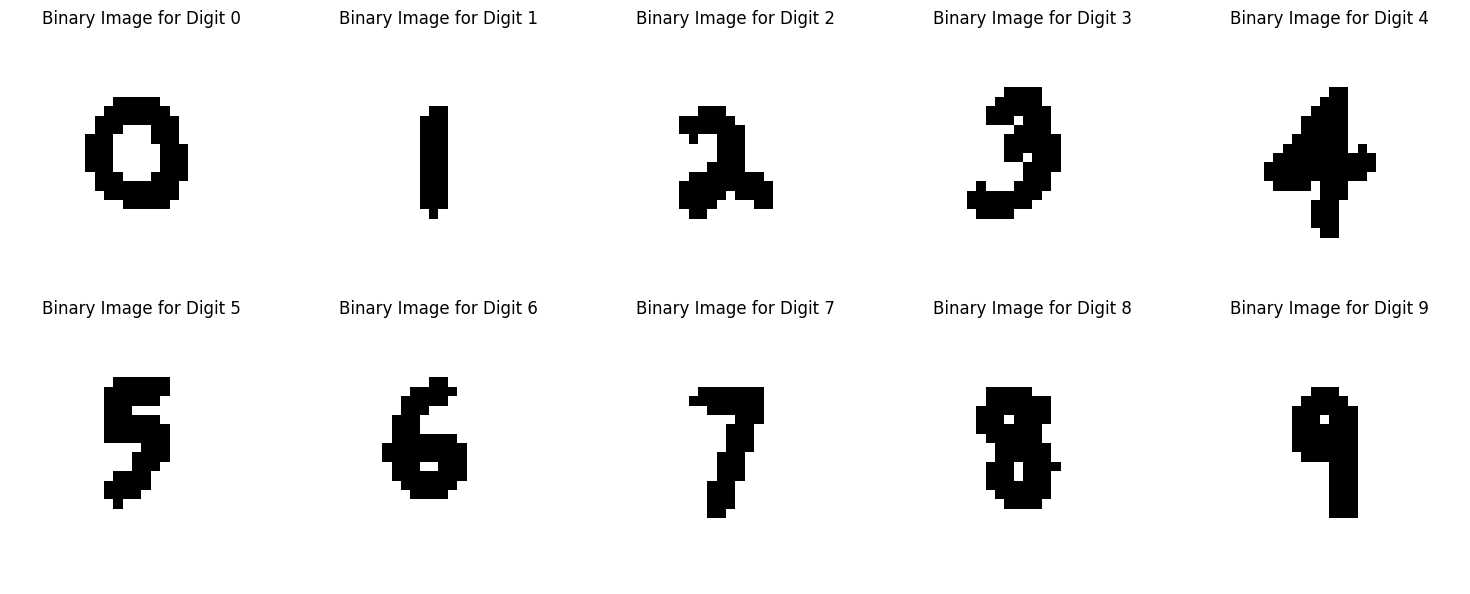

In [44]:
loaded_binary_images = {}

# define starting image numbers for each digit
start_image_numbers = [0, 10, 20, 30, 40, 56, 60, 70, 80, 90]
digit_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # define digit names

output_dir = f"drive/MyDrive/AI/training_set_binary/{member_list[0]}"

# iterate through each starting image number
for start_image_number, digit_name in zip(start_image_numbers, digit_names):
    # format the image filename
    image_name = f"{start_image_number}_binary.png"
    image_path = os.path.join(output_dir, image_name)

    # load the image
    image = Image.open(image_path)

    # add the image to the dictionary, using digit as the key
    loaded_binary_images[digit_name] = image

# create a 2x5 grid to display images for all digits
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# plot one image for each digit
for ax, (digit, image) in zip(axes.flatten(), loaded_binary_images.items()):
    ax.imshow(image, cmap='gray', vmin=0, vmax=1)
    ax.set_title(f'Binary Image for Digit {digit}')
    ax.axis('off')

plt.tight_layout()
plt.show()
